In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Create dataset manually
data = {
    'CustomerID': range(1, 201),
    'Gender': ['Male']*100 + ['Female']*100,
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 137, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,51,98,60
1,2,Male,57,136,72
2,3,Male,44,117,18
3,4,Male,30,54,68
4,5,Male,46,38,96


In [6]:
# Check for nulls and data types
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Encode Gender column (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


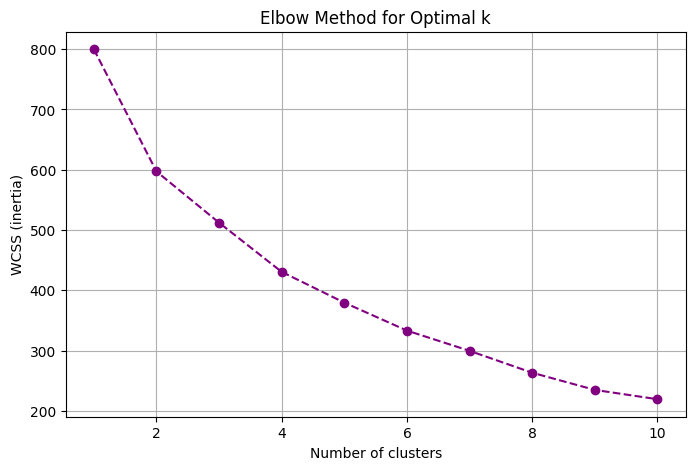

In [7]:
# Finding the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (inertia)')
plt.grid(True)
plt.show()


In [8]:
# Applying  KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,51,98,60,2
1,2,0,57,136,72,2
2,3,0,44,117,18,4
3,4,0,30,54,68,0
4,5,0,46,38,96,0


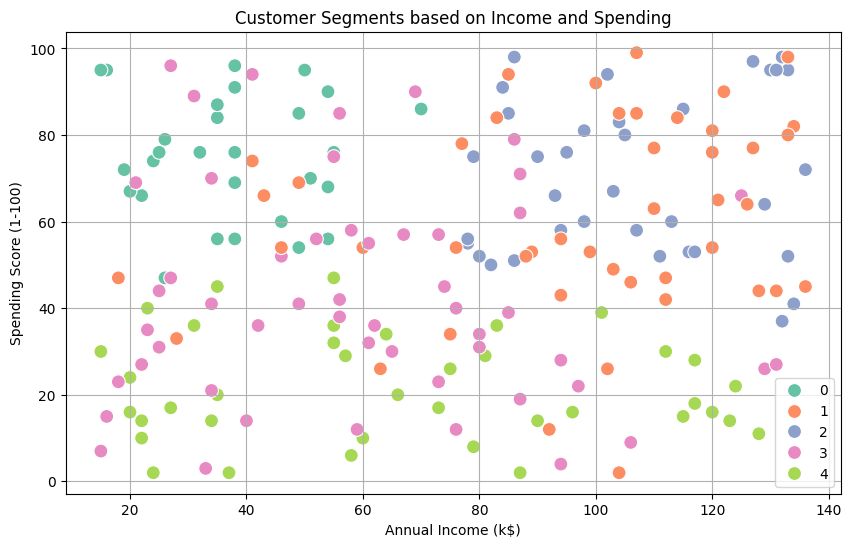

In [9]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments based on Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


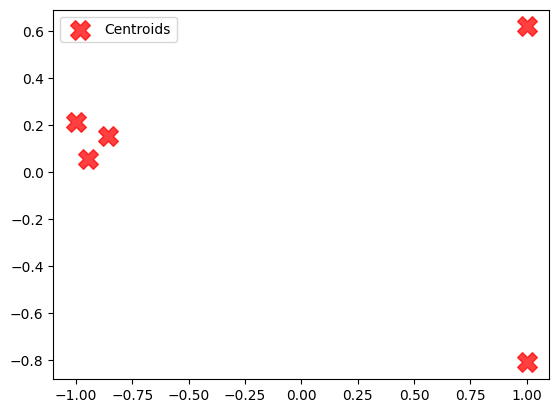

In [10]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()


In [11]:
df['Cluster'] = kmeans.labels_
df.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,56.142857,0.071429,45.464286,37.571429,75.071429
1,146.755556,1.000000,52.422222,96.488889,60.733333
2,48.297297,0.000000,46.324324,107.000000,68.837838
3,152.750000,1.000000,31.038462,60.000000,42.596154
4,57.736842,0.026316,43.973684,66.736842,21.710526


In [12]:
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         56.142857  0.071429  45.464286           37.571429   
1        146.755556  1.000000  52.422222           96.488889   
2         48.297297  0.000000  46.324324          107.000000   
3        152.750000  1.000000  31.038462           60.000000   
4         57.736842  0.026316  43.973684           66.736842   

         Spending Score (1-100)  
Cluster                          
0                     75.071429  
1                     60.733333  
2                     68.837838  
3                     42.596154  
4                     21.710526  


In [13]:
cluster_labels = {
    0: 'Premium Customers',
    1: 'Budget Customers',
    2: 'Average Customers'
}

df['Customer_Type'] = df['Cluster'].map(cluster_labels)


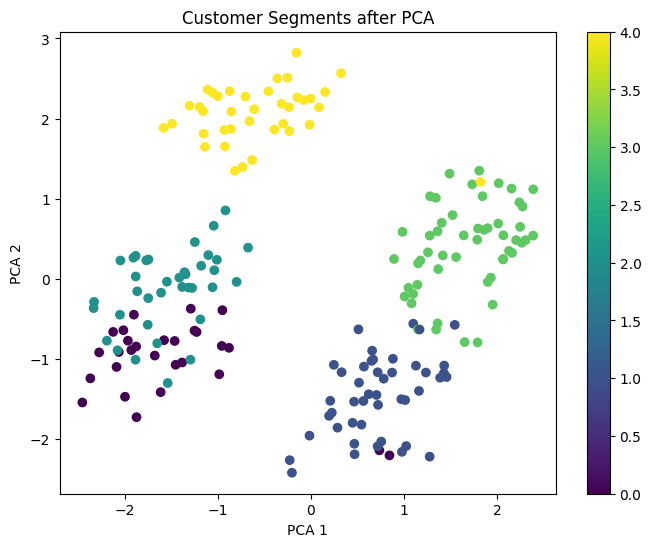

In [15]:
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns only
numeric_df = df.select_dtypes(include=['number'])

#Standardizing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Applying PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

# Keeping only numeric columns
numeric_data = df.select_dtypes(include=['number']).drop('Cluster', axis=1)

# Calculating the silhouette score
score = silhouette_score(numeric_data, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.16686239366195502


In [20]:
# View the mean values of each feature for each cluster
cluster_profiles = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         56.142857  0.071429  45.464286           37.571429   
1        146.755556  1.000000  52.422222           96.488889   
2         48.297297  0.000000  46.324324          107.000000   
3        152.750000  1.000000  31.038462           60.000000   
4         57.736842  0.026316  43.973684           66.736842   

         Spending Score (1-100)  
Cluster                          
0                     75.071429  
1                     60.733333  
2                     68.837838  
3                     42.596154  
4                     21.710526  


In [19]:
df.to_csv("clustered_customers.csv", index=False)


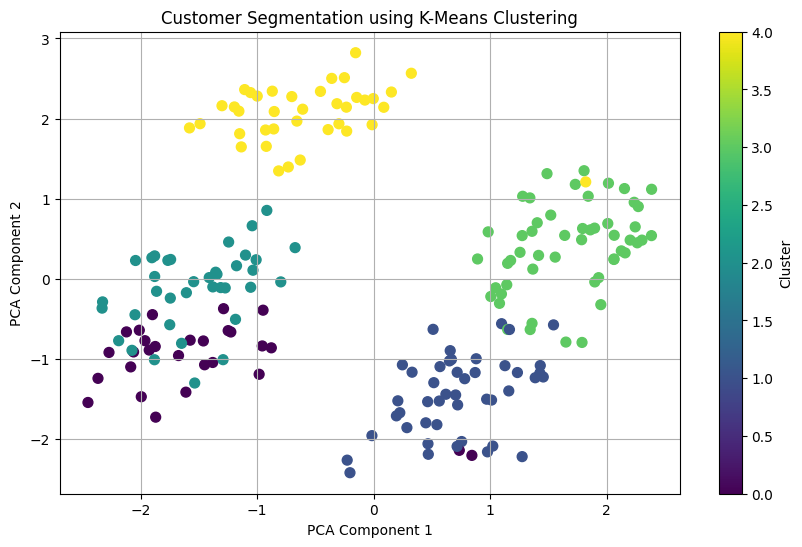

Silhouette Score: 0.34


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer_Type
0,1,0,51,98,60,2,Average Customers
1,2,0,57,136,72,2,Average Customers
2,3,0,44,117,18,4,NaN
3,4,0,30,54,68,0,Premium Customers
4,5,0,46,38,96,0,Premium Customers


In [21]:
# Label the clusters in the original dataframe
df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Evaluating clustering with Silhouette Score
score = silhouette_score(scaled_data, df['Cluster'])
print("Silhouette Score:", round(score, 2))

# final dataset with clusters
df.head()
